1. 딥러닝이란
2. 텐서 표현과 연산
3. 딥러닝 구조와 모델
4. 딥러닝 모델 학습
--------------------
1. 딥러닝이란

Q. 다층 퍼셉트론을 학습시키는것이 어려운 이유는 무엇일까요?

=> 많은 은닉층의 수와 미분이 불가능한 계단함수의 존재가 학습의 난이도를 높입니다.

Q. 일반 신경망과 딥러닝 신경망의 차이 중 하나는 특징 추출과정의 포함 여부입니다. 특징 추출을 포함했을 때 어떤 장점이 있나요?

=> 사람의 개입이 들어가지 않아 사람의 편견으로 인한 오류가 적고 추론시간이 짧아지며 성능이 높아지는 장점이 있습니다.

Q. 딥러닝 신경망은 일반 신경망과 비교했을 때 어떤 문제점들을 갖고 있나요?

=> 더 많은 학습 데이터를 필요로하며 훈련을 위해 많은 시간과 비용이 쓰이고, 기울기 소멸 문제, 과적합 등의 문제가 있습니다.

[노드1 정리]
*   인공신경망은 인간 두뇌에 대한 계산적 모델을 통해 인공지능을 구현하려는 분야이며, 생체신경망을 모방해서 만든 퍼셉트론과 다층 퍼셉트론 그리고 역전파 알고리즘입니다.
*   인공신경망은 은닉층이 소수인 반면, 딥러닝은 은닉층이 다수 포함된 심층신경망입니다.
*   딥러닝은 기존의 문제점인 기울기 소멸 문제와 과적합 문제를 해결하고 계속해서 발전 중입니다.

2. 텐서 표현과 연산

2-2. 텐서(Tensor)
*   텐서(Tensor)는 데이터를 담기위한 컨테이너(container)로서 다차원 배열 또는 리스트 형태와 유사합니다. 일반적으로 수치형 데이터를 저장하고, 동적 크기를 가집니다.
*   텐서플로우(TensorFlow)는 데이터 표현과 다양한 수학식을 계산하기 위한 기본 구조로 텐서를 사용해서 표현합니다.

- Rank: 축(차원)의 개수
- Shape: 형상(각 축의 요소의 개수)
- Type: 데이터 타입



In [1]:
import tensorflow as tf

# 0차원 텐서는 스칼라(scalar)라고도 부르며, 축과 형상이 없습니다.
# tf.constant()를 사용하면 상수(constant) 텐서를 만들 수 있고
# 만든 텐서에 tf.rank()를 적용하면 축의 개수를 알 수 있습니다.

t0 = tf.constant(1)
print(t0)
print(tf.rank(t0)) # rank는 축의 개수를 반환합니다.

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)


In [2]:
# 1차원 텐서는 리스트와 유사한 텐서, 벡터(vector)라고도 부르며, 1개의 축이 존재

t1 = tf.constant([1, 2, 3])
print(t1)
print(tf.rank(t1)) # rank는 축의 개수를 반환합니다.

tf.Tensor([1 2 3], shape=(3,), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)


In [4]:
# 2차원 텐서는 행렬과 같은 모양으로 2개의 축이 존재. 일반적인 수치, 통계 데이터셋이 여기에 해당됩니다. 주로 샘플(samples)과 특성(features)을 가진 구조로 사용됩니다

t2 = tf.constant([[1, 2, 3], [4, 5, 6], [7,8,9]])
print(t1)
print(tf.rank(t2))  # rank는 축의 개수를 반환합니다.

tf.Tensor(
[[1 2 3]
 [4 5 6]
 [7 8 9]], shape=(3, 3), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)


In [5]:
# 3차원 텐서는 큐브(cube)와 같은 모양, 3개의 축
# 데이터가 연속된 시퀀스 데이터나 시간 축이 포함된 시계열 데이터에 해당합니다. 주로 샘플(samples), 타임스텝(timesteps), 특성(features)을 가진 구조로 사용

t2 = tf.constant([[[1, 2, 3], [4, 5, 6], [7,8,9]], [[1, 2, 3], [4, 5, 6], [7,8,9]], [[1, 2, 3], [4, 5, 6], [7,8,9]]])
print(t1)
print(tf.rank(t2))

tf.Tensor(
[[1 2 3]
 [4 5 6]
 [7 8 9]], shape=(3, 3), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)


In [ ]:
# 4차원 텐서, 4개의 축
# 샘플(samples), 높이(height), 너비(width), 컬러 채널(channel)을 가진 구조로 사용

# 5차원 텐서, 5개의 축
# 샘플(samples), 프레임(frames)=시간, 높이(height), 너비(width), 컬러 채널(channel)을 가진 구조

2-3. 텐서 타입 및 변환
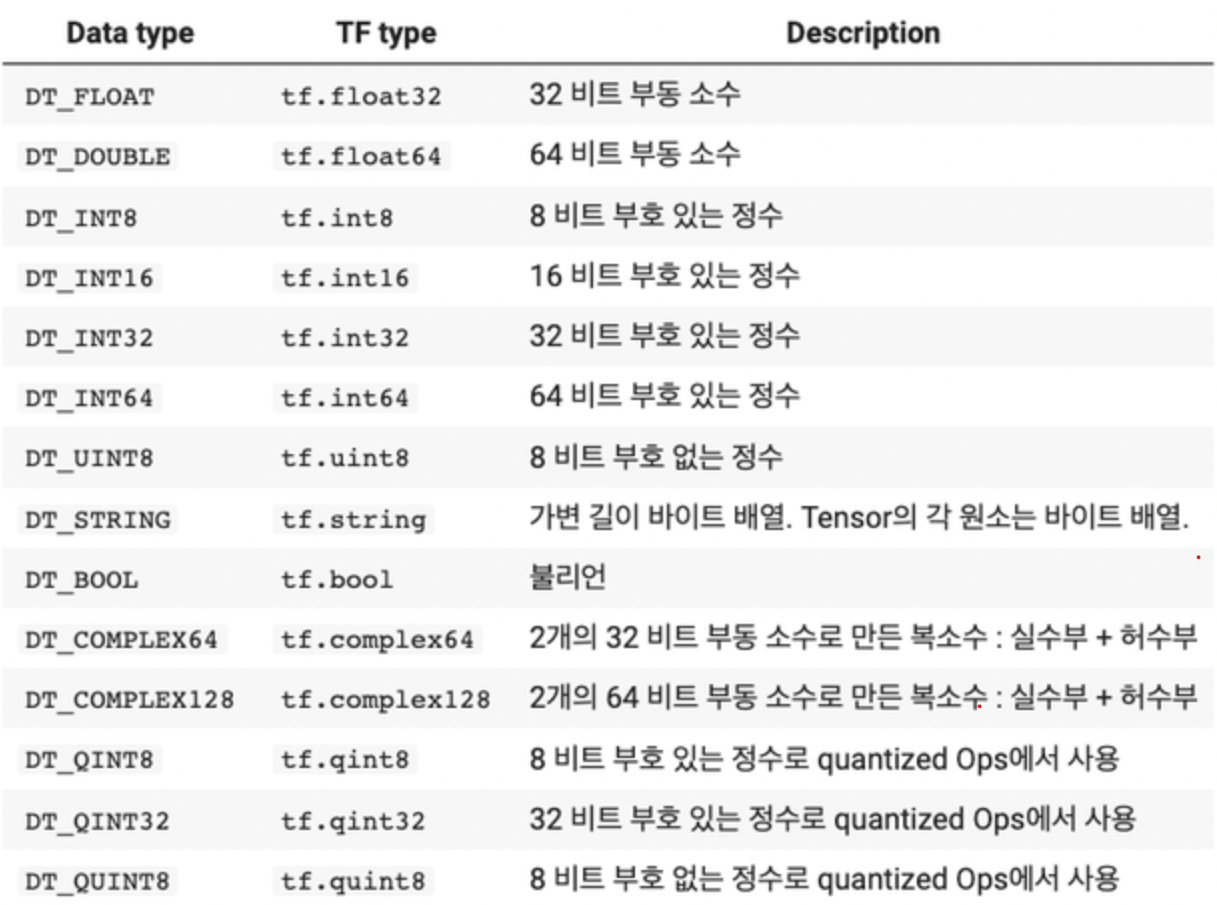

In [8]:
# 상수 값 2인 텐서를 생성
i = tf.constant(2)
print(i)

# 상수 값 2.0인 텐서를 생
f = tf.constant(2.)
print(f)

# 문자열을 값으로 가지는 텐서를 생성
s = tf.constant('Suan')
print(s)

# 필요한 텐서의 타입을 지정하여 생성
f16 = tf.constant(2., dtype=tf.float16)
print(f16)

# 8비트의 정수형인 tf.int8을 지정하여 텐서를 생성
i8 = tf.constant(2, dtype=tf.int8)
print(i8)

tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(2.0, shape=(), dtype=float32)
tf.Tensor(b'Suan', shape=(), dtype=string)
tf.Tensor(2.0, shape=(), dtype=float16)
tf.Tensor(2, shape=(), dtype=int8)


In [9]:
# 텐서의 타입을 변환: tf.cast를 사용
# 16비트 실수형 tf.float16을 32비트 실수형 tf.float32로 변환
f32 = tf.cast(f16, tf.float32)
print(f32)

tf.Tensor(2.0, shape=(), dtype=float32)


In [11]:
# 텐서 형상 변환 : tf.reshape 함수
x = tf.constant([[1], [2], [3]])
print(x)
print(x.shape)

print()

y = tf.reshape(x, [1, 3])
print(y)
print(y.shape)

tf.Tensor(
[[1]
 [2]
 [3]], shape=(3, 1), dtype=int32)
(3, 1)

tf.Tensor([[1 2 3]], shape=(1, 3), dtype=int32)
(1, 3)


In [13]:
# 텐서 전치 : tf.transpose 함수
print(y)

print()

print(tf.transpose(y))
print(y.shape)

tf.Tensor([[1 2 3]], shape=(1, 3), dtype=int32)

tf.Tensor(
[[1]
 [2]
 [3]], shape=(3, 1), dtype=int32)
(1, 3)


In [18]:
# 차원 압축 : tf.squeeze 함수, 1인 차원을 제거
print(x)
print(tf.rank(x)) # rank는 축의 개수를 반환합니다.

print()

z = tf.constant(tf.squeeze(x))
print(tf.rank(z)) # rank는 축의 개수를 반환합니다.

tf.Tensor(
[[1]
 [2]
 [3]], shape=(3, 1), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)

tf.Tensor(1, shape=(), dtype=int32)


In [41]:
# 차원 추가 : tf.expand_dims 함수
print(y)
print()

print(tf.expand_dims(y, axis=0))
print()

print(tf.expand_dims(y, axis=1))
print()

print(tf.expand_dims(y, axis=2))

tf.Tensor([[1 2 3]], shape=(1, 3), dtype=int32)

tf.Tensor([[[1 2 3]]], shape=(1, 1, 3), dtype=int32)

tf.Tensor([[[1 2 3]]], shape=(1, 1, 3), dtype=int32)

tf.Tensor(
[[[1]
  [2]
  [3]]], shape=(1, 3, 1), dtype=int32)


In [20]:
# 텐서분리 : tf.split 함수
print(x)

print()

print(tf.split(x, 3))

tf.Tensor(
[[1]
 [2]
 [3]], shape=(3, 1), dtype=int32)
[<tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[1]], dtype=int32)>, <tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[2]], dtype=int32)>, <tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[3]], dtype=int32)>]


In [25]:
# 텐서 연결 : tf.concat 함수, 지정한 축 axis를 기준으로 텐서들을 이어붙입니다.
print(x)

print()

print(tf.concat([x, x], axis=0))

print()

print(tf.concat([x, x], axis=1))

tf.Tensor(
[[1]
 [2]
 [3]], shape=(3, 1), dtype=int32)

tf.Tensor(
[[1]
 [2]
 [3]
 [1]
 [2]
 [3]], shape=(6, 1), dtype=int32)

tf.Tensor(
[[1 1]
 [2 2]
 [3 3]], shape=(3, 2), dtype=int32)


텐서 변환 정리
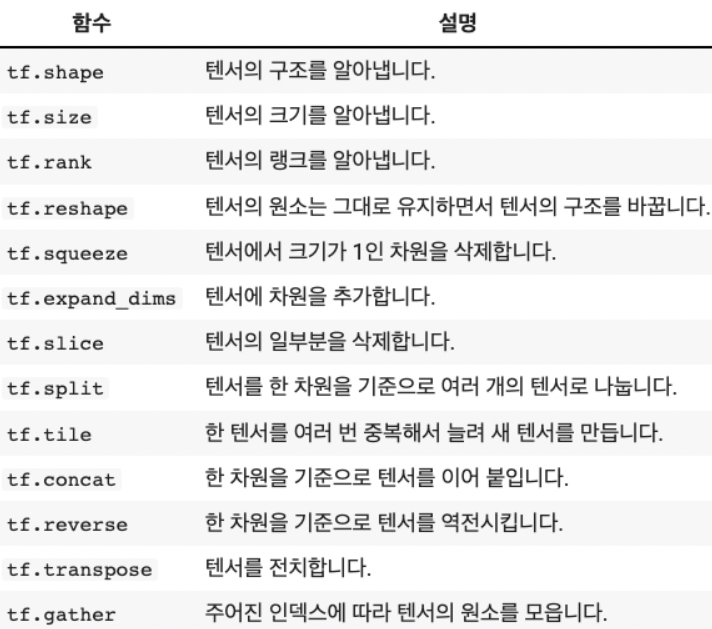

In [27]:
# 0차원 텐서의 연산
print(tf.constant(2) + tf.constant(2))
print(tf.constant(2) - tf.constant(2))
print(tf.add(tf.constant(2), tf.constant(2)))
print(tf.subtract(tf.constant(2), tf.constant(2)))

print()

print(tf.constant(2) * tf.constant(2))
print(tf.constant(2) / tf.constant(2))
print(tf.multiply(tf.constant(2), tf.constant(2)))
print(tf.divide(tf.constant(2), tf.constant(2)))

tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)

tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(1.0, shape=(), dtype=float64)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(1.0, shape=(), dtype=float64)


In [32]:
# 다른 타입을 가지는 텐서는 연산이 되지 않고, 에러가 발생
# 다른 타입을 가지는 텐서는 연산을 위해서 타입을 변환해 주어야합니다.
print(tf.constant(2))   # int32
print(tf.constant(2.2)) # float32
print()

print(tf.cast(tf.constant(2), tf.float32) + tf.constant(2.2))

tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(2.2, shape=(), dtype=float32)

tf.Tensor(4.2, shape=(), dtype=float32)


In [34]:
# 1차원 텐서의 연산
t1 = tf.constant([1,2])
t2 = tf.constant([3,4])
print(tf.rank(t1))
print(tf.rank(t2))
print()

print(t1+t2)
print(t1-t2)
print(t1*t2)
print(t1/t2)

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)

tf.Tensor([4 6], shape=(2,), dtype=int32)
tf.Tensor([-2 -2], shape=(2,), dtype=int32)
tf.Tensor([3 8], shape=(2,), dtype=int32)
tf.Tensor([0.33333333 0.5       ], shape=(2,), dtype=float64)


In [38]:
# 2차원 텐서의 연산
a = tf.constant([[1,0], [1,0]])
b = tf.constant([[2,1], [2,1]])
print(tf.rank(a))
print(tf.rank(b))

print()

print(a + b) # element-wise addition
print(a - b) # element-wise subtraction
print(a * b) # element-wise multiplication
print(a @ b) # matrix multiplication
print(a / b) # element-wise division

tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)

tf.Tensor(
[[3 1]
 [3 1]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[-1 -1]
 [-1 -1]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[2 0]
 [2 0]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[2 1]
 [2 1]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[0.5 0. ]
 [0.5 0. ]], shape=(2, 2), dtype=float64)




*   reduce_max(): 텐서 값 중에서 최대값을 계산합니다.


*   argmax(): 최대값의 위치를 반환합니다. 예제에서는 [4.0, 5.0, 6.0] 보다 [10.0, 9.0, 8.0]이 다 크기 때문에 [0 0 0]이 아니라 [1 1 1]의 결과를 보여주고 있습니다.

*   nn.softmax(): 텐서의 값을 0과 1 사이의 값으로 보여줍니다. 예제에서는 [4.0, 5.0, 6.0] 값이 [0.09003057 0.24472848 0.66524094]으로 변환되었고, [10.0, 9.0, 8.0]이 [0.66524094 0.24472848 0.09003057]로 변환되었습니다.





In [39]:
c = tf.constant([[4.0, 5.0, 6.0],
                 [10.0, 9.0, 8.0]])

print(tf.reduce_max(c))
print(tf.argmax(c))
print(tf.nn.softmax(c))

tf.Tensor(10.0, shape=(), dtype=float32)
tf.Tensor([1 1 1], shape=(3,), dtype=int64)
tf.Tensor(
[[0.09003057 0.24472848 0.66524094]
 [0.66524094 0.24472848 0.09003057]], shape=(2, 3), dtype=float32)


In [44]:
a = tf.constant([1, 2, 3, 4, 5, 6, 7, 8])
b = tf.constant([[1., 2., 3., 4., 5., 6., 7., 8.]])
print(a)
print(b)
print()
# Q. 위에 있는 2개의 텐서를 행렬곱연산이 가능하도록 3차원 텐서로 변환해주세요.

a = tf.cast(a, tf.float32) # 실수형 tf.float32로 변환
print(a)
print()

a_3d = tf.reshape(a, (2, 2, 2))
b_3d = tf.reshape(b, (2, 2, 2))
print(a_3d)
print()
print(b_3d)
print()
print(a_3d@b_3d)

tf.Tensor([1 2 3 4 5 6 7 8], shape=(8,), dtype=int32)
tf.Tensor([[1. 2. 3. 4. 5. 6. 7. 8.]], shape=(1, 8), dtype=float32)

tf.Tensor([1. 2. 3. 4. 5. 6. 7. 8.], shape=(8,), dtype=float32)

tf.Tensor(
[[[1. 2.]
  [3. 4.]]

 [[5. 6.]
  [7. 8.]]], shape=(2, 2, 2), dtype=float32)

tf.Tensor(
[[[1. 2.]
  [3. 4.]]

 [[5. 6.]
  [7. 8.]]], shape=(2, 2, 2), dtype=float32)

tf.Tensor(
[[[  7.  10.]
  [ 15.  22.]]

 [[ 67.  78.]
  [ 91. 106.]]], shape=(2, 2, 2), dtype=float32)
